# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
print(df.head(5))

   Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1               

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(81937, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
#The dataset is a record of dog licenses in New York City as of April 28, 2016. 
#Each row in the dataset represents an individual dog's license record. 
#Owner Zip Code: column contains the ZIP code of the dog owner's address.
#Animal Name: column contains the name of the dog.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [5]:
#What is the most common primary breed gender?
#How many dogs in the dataset are vaccinated versus not vaccinated?
#What is the average age of the dogs in the dataset?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [7]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: count, dtype: int64

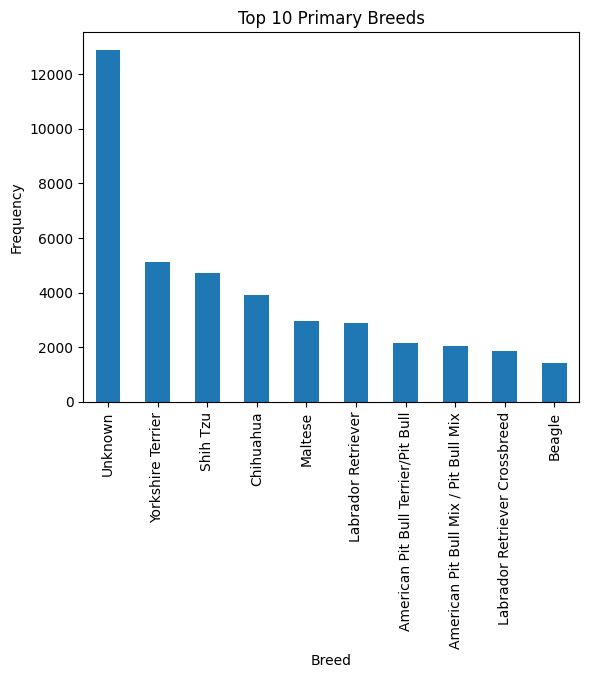

In [8]:
import matplotlib.pyplot as plt 

top_10_breeds = df['Primary Breed'].value_counts().nlargest(10)
top_10_breeds.plot(kind='bar')
plt.title('Top 10 Primary Breeds')
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.show()

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [9]:
# Which ZIP code has the highest number of dogs of a specific primary breed (e.g., Labrador Retriever)?
# Is there a correlation between certain primary breeds and specific ZIP codes in terms of population density?
# What are the top three primary breeds in the most populous ZIP code?

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

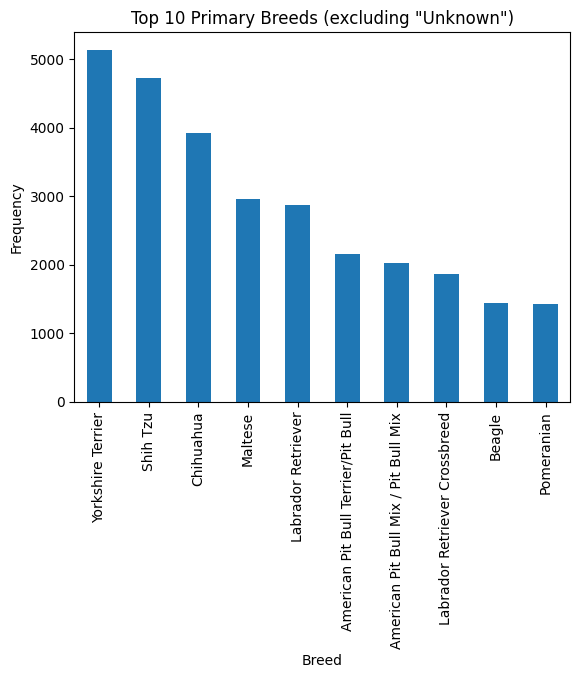

In [10]:
filtered_df = df[df['Primary Breed'] != 'Unknown']
top_10_breeds = filtered_df['Primary Breed'].value_counts().nlargest(10)
top_10_breeds.plot(kind='bar')
plt.title('Top 10 Primary Breeds (excluding "Unknown")')
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.show()

## What are the most popular dog names?

In [11]:
filtered_names = df[~df['Animal Name'].str.lower().isin(['unknown'])]
top_10_filtered_names = filtered_names['Animal Name'].value_counts().nlargest(10)
top_10_filtered_names

Animal Name
Bella      527
Max        515
Charlie    403
Lola       387
Rocky      354
Lucy       338
Coco       308
Buddy      300
Lucky      291
Daisy      279
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
roy_count = df['Animal Name'].str.lower().value_counts().get('roy', 0)
roy_count

np.int64(11)

In [13]:
max_count= df['Animal Name'].str.lower().value_counts().get('max', 0) 
max_count 

np.int64(652)

In [14]:
maxwell_count= df['Animal Name'].str.lower().value_counts().get('maxwell', 0) 
maxwell_count 

np.int64(37)

## What percentage of dogs are guard dogs?

In [15]:
percentage = df['Guard or Trained'].value_counts(normalize=True) * 100
percentage

Guard or Trained
No     99.897128
Yes     0.102872
Name: proportion, dtype: float64

## What are the actual numbers?

In [16]:
df['Guard or Trained'].astype(str).str.lower().value_counts()

Guard or Trained
no     49525
nan    32361
yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [17]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [18]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

In [19]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
df['Guard or Trained'] = df['Guard or Trained'].astype(str).str.lower()
guard_counts = df['Guard or Trained'].value_counts()
print(guard_counts)

Guard or Trained
no     81886
yes       51
Name: count, dtype: int64


## What are the top dog breeds for guard dogs? 

In [20]:
df['Guard or Trained'].fillna('No').astype(str).str.lower()
filtered_df = df[df['Primary Breed'].str.lower() != 'unknown']
guard_dogs = filtered_df[filtered_df['Guard or Trained'] == 'yes']
breed_counts = guard_dogs['Primary Breed'].value_counts()
top_10_guard_breeds = breed_counts.head(10)
print(top_10_guard_breeds)

Primary Breed
German Shepherd Dog                     4
Rottweiler                              3
Labrador Retriever                      3
Chihuahua                               3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Golden Retriever                        1
Poodle, Standard                        1
German Shepherd Crossbreed              1
Name: count, dtype: int64


## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [21]:
df['Animal Birth'] = pd.to_datetime(df['Animal Birth'], errors='coerce')
df['year'] = df['Animal Birth'].dt.year
print(df.head())

   Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               no        Yes   
1               

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [22]:
from datetime import datetime

current_year = datetime.now().year
df['age'] = current_year - df['year']
average_age = df['age'].mean()

print(df[['Animal Birth', 'year', 'age']].head())
print(f"The average age of the dogs is approximately {average_age:.2f} years.")

  Animal Birth  year  age
0   2007-11-01  2007   17
1   2013-04-01  2013   11
2   2014-09-01  2014   10
3   2008-04-01  2008   16
4   2014-01-01  2014   10
The average age of the dogs is approximately 14.34 years.


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [23]:
df_neighborhoods = pd.read_csv("zipcodes-neighborhoods.csv", usecols=['zip', 'neighborhood'])
df_dogs = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", usecols=['Owner Zip Code', 'Animal Name'])
df_dogs.columns = df_dogs.columns.str.strip()
df_neighborhoods.columns = df_neighborhoods.columns.str.strip()
df_dogs['Owner Zip Code'] = df_dogs['Owner Zip Code'].astype(str)
df_neighborhoods['zip'] = df_neighborhoods['zip'].astype(str)
df_merged = pd.merge(df_dogs, df_neighborhoods, left_on='Owner Zip Code', right_on='zip', how='left')
print(df_merged.head())


  Owner Zip Code   Animal Name                neighborhood    zip
0          10024     BLUE MACK             Upper West Side  10024
1          10461  Indie Zephir             Southeast Bronx  10461
2          10013         Bilal  Greenwich Village and Soho  10013
3          10025         Buddy             Upper West Side  10025
4          10013           Ali  Greenwich Village and Soho  10013


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [27]:
bronx = df_merged[df_merged['neighborhood'].str.contains("Bronx", na=False)]
bronx['Animal Name'].value_counts().head()

Animal Name
Rocky    47
Max      39
Bella    37
Lucky    29
Coco     28
Name: count, dtype: int64

In [32]:
Brooklyn = df_merged[df_merged['neighborhood'].str.contains("Brooklyn", na=False)].copy()
Brooklyn.loc[Brooklyn['Animal Name'].str.lower().isin(['unknown']), 'Animal Name'] = ''
animal_name_countsBrooklyn = Brooklyn['Animal Name'][Brooklyn['Animal Name'] != ''].value_counts().head()
print(animal_name_countsBrooklyn)

Animal Name
Max        66
Charlie    59
Lucy       55
Bella      53
Lola       46
Name: count, dtype: int64


In [49]:
TheUpperEastSide = df_merged[df_merged['neighborhood'] == "Upper East Side"].copy()
TheUpperEastSide.loc[TheUpperEastSide['Animal Name'].str.lower().isin(['unknown']), 'Animal Name'] = ''
animal_name_countsTheUpperEastSide = TheUpperEastSide['Animal Name'][TheUpperEastSide['Animal Name'] != ''].value_counts().head()
print(animal_name_countsTheUpperEastSide)

Animal Name
Lucy       40
Bella      31
Coco       29
Charlie    29
NO NAME    26
Name: count, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [74]:
df_merged.loc[df_merged['Primary Breed'].str.lower().isin(['unknown']), 'Primary Breed'] = ''
df_filtered = df_merged[df_merged['Primary Breed'] != '']
breed_counts = df_filtered.groupby(['neighborhood', 'Primary Breed']).size().reset_index(name='count')
most_common_breeds = breed_counts.loc[breed_counts.groupby('neighborhood')['count'].idxmax()]
print(most_common_breeds.head())

                  neighborhood      Primary Breed  count
137               Borough Park  Yorkshire Terrier    115
233     Bronx Park and Fordham  Yorkshire Terrier     88
376  Bushwick and Williamsburg  Yorkshire Terrier    135
494     Canarsie and Flatlands  Yorkshire Terrier    137
577              Central Bronx  Yorkshire Terrier     82


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [76]:
significant_breeds = spay_neuter_counts.sum(axis=1) >= 10
spay_neuter_counts = spay_neuter_counts[significant_breeds]
spay_neuter_rates = spay_neuter_counts.div(spay_neuter_counts.sum(axis=1), axis=0)
least_spayed_neutered = spay_neuter_rates[spay_neuter_rates['No'] > 0].sort_values(by='No', ascending=False)
print(least_spayed_neutered.head())

Spayed or Neut                       No       Yes
Primary Breed   Animal Gender                    
Morkie          M              0.723810  0.276190
                F              0.682353  0.317647
American Bully  F              0.666667  0.333333
                M              0.646154  0.353846
Chinese Crested F              0.615385  0.384615


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

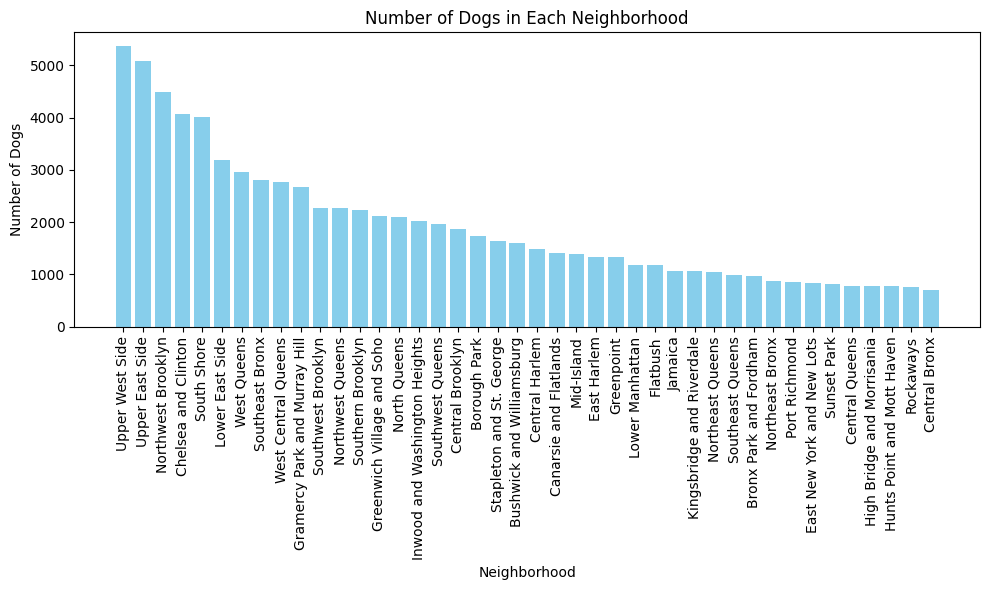

In [77]:
import matplotlib.pyplot as plt
dogs_per_neighborhood = df_merged['neighborhood'].value_counts().reset_index()
dogs_per_neighborhood.columns = ['neighborhood', 'count']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(dogs_per_neighborhood['neighborhood'], dogs_per_neighborhood['count'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Dogs')
plt.title('Number of Dogs in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Which borough has the highest number of dogs per-capita?


In [110]:
import pandas as pd

boro_population = pd.read_csv('boro_population.csv')
dog_licenses = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
zipcodes_neighborhoods = pd.read_csv('zipcodes-neighborhoods.csv')

zipcodes_neighborhoods.rename(columns={'zip': 'Owner Zip Code'}, inplace=True)
dogs_with_boroughs = pd.merge(dog_licenses, zipcodes_neighborhoods, on='Owner Zip Code', how='left')

dogs_per_borough = dogs_with_boroughs['borough'].value_counts().reset_index()
dogs_per_borough.columns = ['borough', 'dog_count']

dogs_per_borough_population = pd.merge(dogs_per_borough, boro_population, on='borough')
dogs_per_borough_population['dogs_per_capita'] = dogs_per_borough_population['dog_count'] / dogs_per_borough_population['population']

print(dogs_per_borough_population)

highest_dogs_per_capita = dogs_per_borough_population.loc[dogs_per_borough_population['dogs_per_capita'].idxmax()]
print(f"Borough with the highest number of dogs per capita: {highest_dogs_per_capita['borough']}")
print(f"Dogs per capita: {highest_dogs_per_capita['dogs_per_capita']}")

         borough  dog_count  population  area_sqmi  dogs_per_capita
0      Manhattan      28536     1644518         23         0.017352
1       Brooklyn      19786     2636735         71         0.007504
2         Queens      16696     2339150        109         0.007138
3          Bronx       7951     1455444         42         0.005463
4  Staten Island       7890      474558         59         0.016626
Borough with the highest number of dogs per capita: Manhattan
Dogs per capita: 0.01735219681389927


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

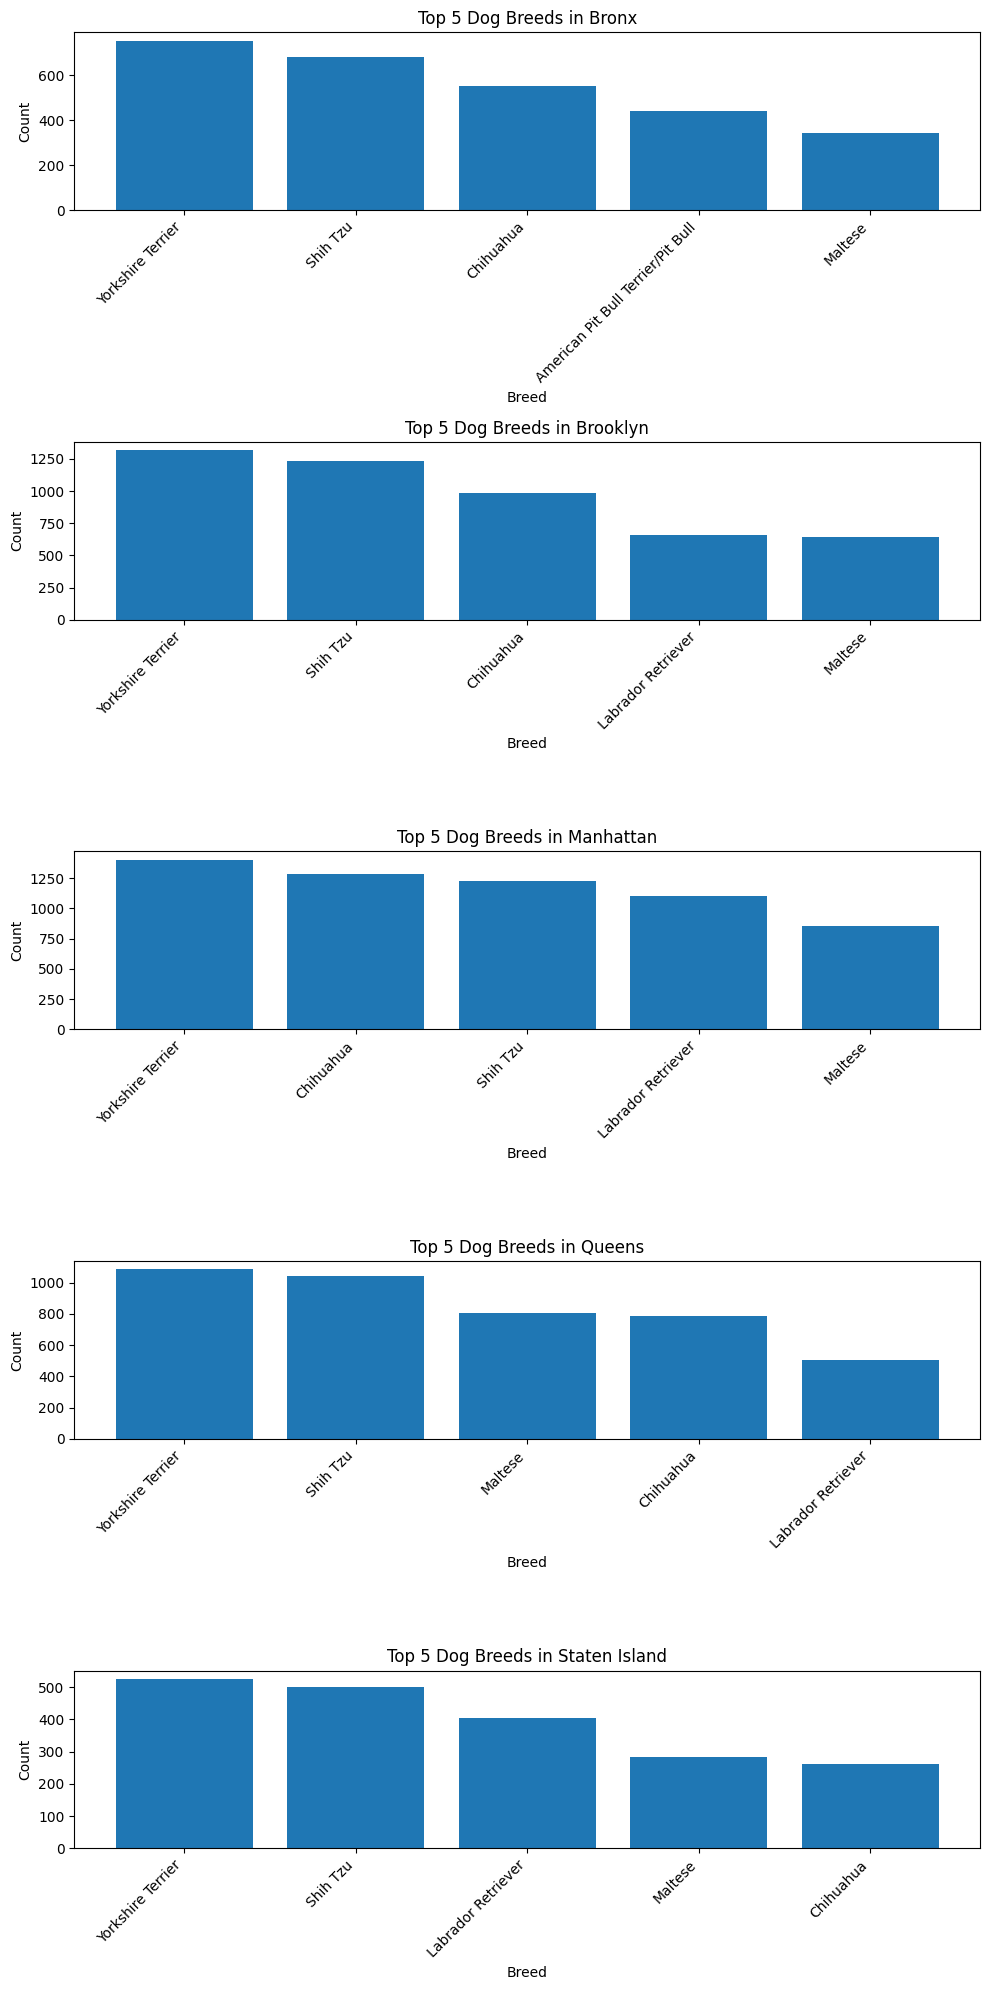

In [107]:
dogs_with_boroughs = dogs_with_boroughs[dogs_with_boroughs['Primary Breed'].str.lower() != 'unknown']
def top_breeds_by_borough(dogs_with_boroughs):
    top_breeds = dogs_with_boroughs.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')
    top_breeds = top_breeds.sort_values(['borough', 'count'], ascending=[True, False])
    top_breeds = top_breeds.groupby('borough').head(5).reset_index(drop=True)
    return top_breeds

top_breeds = top_breeds_by_borough(dogs_with_boroughs)

boroughs = top_breeds['borough'].unique()
fig, axes = plt.subplots(nrows=len(boroughs), ncols=1, figsize=(10, 20))

for i, borough in enumerate(boroughs):
    ax = axes[i]
    borough_data = top_breeds[top_breeds['borough'] == borough]
    ax.bar(borough_data['Primary Breed'], borough_data['count'])
    ax.set_title(f'Top 5 Dog Breeds in {borough}')
    ax.set_xlabel('Breed')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(borough_data['Primary Breed'])))
    ax.set_xticklabels(borough_data['Primary Breed'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

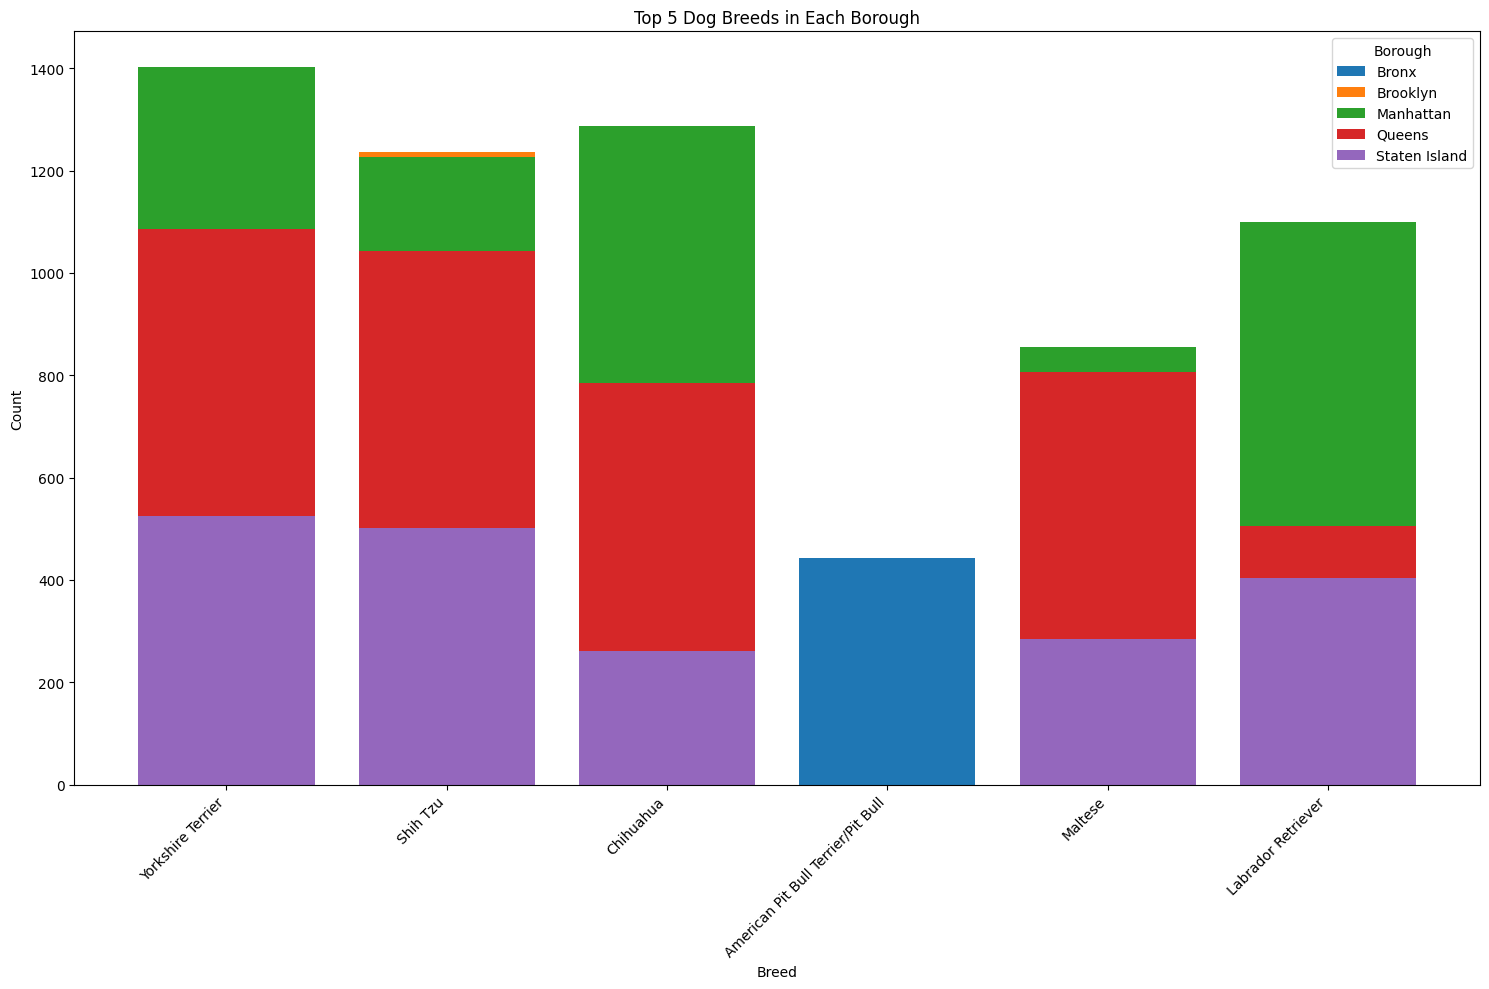

In [108]:

dogs_with_boroughs = dogs_with_boroughs[dogs_with_boroughs['Primary Breed'].str.lower() != 'unknown']

def top_breeds_by_borough(dogs_with_boroughs):
    top_breeds = dogs_with_boroughs.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')
    top_breeds = top_breeds.sort_values(['borough', 'count'], ascending=[True, False])
    top_breeds = top_breeds.groupby('borough').head(5).reset_index(drop=True)
    return top_breeds

top_breeds = top_breeds_by_borough(dogs_with_boroughs)


boroughs = top_breeds['borough'].unique()
colors = plt.cm.tab10.colors  # Use a colormap for different colors

fig, ax = plt.subplots(figsize=(15, 10))

for i, borough in enumerate(boroughs):
    borough_data = top_breeds[top_breeds['borough'] == borough]
    ax.bar(borough_data['Primary Breed'], borough_data['count'], color=colors[i], label=borough)

ax.set_title('Top 5 Dog Breeds in Each Borough')
ax.set_xlabel('Breed')
ax.set_ylabel('Count')
ax.legend(title='Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
